In [1]:
# ========== Part 1: Dataset Information (Unstructured 2D) ==========
import numpy as np
import os
import matplotlib.pyplot as plt

# Set data path
data_root = '/Path/to/your/data'  # Modify to your data path

# Load metadata
metadata = np.load(os.path.join(data_root, 'data.npz'), allow_pickle=True)

# Extract information
variables = metadata['variables']
times = metadata['times']
train_groups = metadata['train_groups']
val_groups = metadata['val_groups']
test_groups = metadata['test_groups']
spatial_size = metadata['spatial_size']
coords = metadata['coords']

# Aggregate all cases
all_groups = {
    'train': train_groups.tolist(),
    'val': val_groups.tolist(),
    'test': test_groups.tolist()
}

# Display dataset information
print("=" * 60)
print("Dataset Information Overview (Unstructured 2D)")
print("=" * 60)
print(f"\nGrid Type: Unstructured Mesh")
print(f"Total Mesh Points: {spatial_size[0]}")
print(f"\nCoordinate Ranges:")
print(f"  X: [{coords[0].min():.4f}, {coords[0].max():.4f}]")
print(f"  Y: [{coords[1].min():.4f}, {coords[1].max():.4f}]")

print(f"\nNumber of Time Steps: {len(times)}")
print(f"Time Steps List: {times[:5]}... (total {len(times)} steps)")

print(f"\nTotal Variables: {len(variables)}")
print("Variable List:")
for i, var in enumerate(variables):
    print(f"  [{i}] {var}")

print(f"\nTotal Cases: {len(train_groups) + len(val_groups) + len(test_groups)}")
print(f"  - Train cases: {len(train_groups)}")
print(f"  - Val cases: {len(val_groups)}")
print(f"  - Test cases: {len(test_groups)}")

print("\nAll Case Names:")
for split, groups in all_groups.items():
    print(f"\n  [{split.upper()}] ({len(groups)} cases):")
    for i, group in enumerate(groups):
        print(f"    [{i}] {group}")

print("\n" + "=" * 60)

Dataset Information Overview (Unstructured 2D)

Grid Type: Unstructured Mesh
Total Mesh Points: 294900

Coordinate Ranges:
  X: [-0.0248, 0.2655]
  Y: [0.0000, 0.0060]

Number of Time Steps: 36
Time Steps List: ['0.0015' '0.0016' '0.0017' '0.0018' '0.0019']... (total 36 steps)

Total Variables: 21
Variable List:
  [0] C2H6.npy
  [1] CH2O.npy
  [2] CH3.npy
  [3] CH3O.npy
  [4] CH3O2.npy
  [5] CH4.npy
  [6] CO.npy
  [7] CO2.npy
  [8] H.npy
  [9] H2.npy
  [10] H2O.npy
  [11] H2O2.npy
  [12] HCO.npy
  [13] HO2.npy
  [14] O.npy
  [15] O2.npy
  [16] OH.npy
  [17] Ux.npy
  [18] Uy.npy
  [19] T.npy
  [20] rho.npy

Total Cases: 12
  - Train cases: 8
  - Val cases: 2
  - Test cases: 2

All Case Names:

  [TRAIN] (8 cases):
    [0] T=1_OF=3.0
    [1] T=2_OF=3.5
    [2] T=1_OF=2.0
    [3] T=2_OF=3.0
    [4] T=0_OF=3.0
    [5] T=2_OF=2.0
    [6] T=0_OF=2.5
    [7] T=1_OF=3.5

  [VAL] (2 cases):
    [0] T=2_OF=2.5
    [1] T=0_OF=3.5

  [TEST] (2 cases):
    [0] T=0_OF=2.0
    [1] T=1_OF=2.5



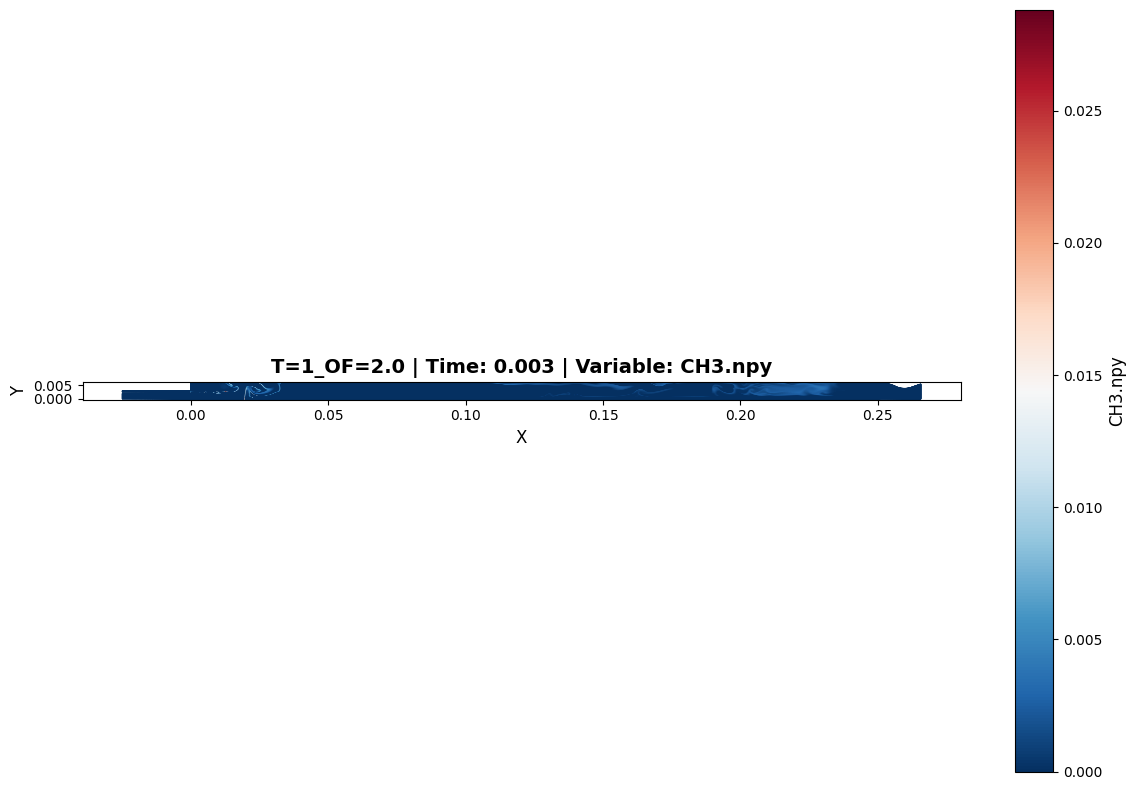


Data Statistics:
  Number of mesh points: 294900
  Min: 0.000000e+00
  Max: 2.881310e-02
  Mean: 4.243093e-04
  Std: 1.135407e-03


In [2]:
# ========== Part 2: Visualization Configuration and Plotting (Unstructured 2D) ==========

# -------------------- Configuration Section --------------------
# Modify the following parameters based on the information above

split_name = 'train'  # Options: 'train', 'val', 'test'
case_idx = 2          # Case index (select based on the indices shown above)
time_idx = 15          # Time step index (0 to len(times)-1)
var_idx = 2           # Variable index (select based on the variable list above)

# Visualization parameters
figsize = (12, 8)
cmap = 'RdBu_r'          # Color map: 'jet', 'viridis', 'RdBu_r', 'coolwarm', etc.
scatter_size = 1      # Size of scatter points (adjust based on mesh density)
show_colorbar = True
save_fig = False      # Whether to save the figure
save_path = './visualization_unstructured_2d.png'  # Save path

# ---------------------------------------------------------------

# Load the corresponding case
if split_name == 'train':
    case_name = train_groups[case_idx]
    case_path = os.path.join(data_root, 'train', f'{case_name}.npz')
elif split_name == 'val':
    case_name = val_groups[case_idx]
    case_path = os.path.join(data_root, 'val', f'{case_name}.npz')
elif split_name == 'test':
    case_name = test_groups[case_idx]
    case_path = os.path.join(data_root, 'test', f'{case_name}.npz')
else:
    raise ValueError(f"Invalid split_name: {split_name}")

# Load data
case_data = np.load(case_path)
data = case_data['data']  # shape: (T, C, N) where N is number of mesh points

# Extract data for specified time step and variable
field_data = data[time_idx, var_idx, :]  # (N,)

# Extract coordinates
Cx = coords[0]  # (N,) - X coordinates of mesh points
Cy = coords[1]  # (N,) - Y coordinates of mesh points

# Visualization using scatter plot
fig, ax = plt.subplots(figsize=figsize)

scatter = ax.scatter(Cx, Cy, c=field_data, cmap=cmap, s=scatter_size,
                     edgecolors='none', rasterized=True)

if show_colorbar:
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(variables[var_idx], fontsize=12)

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title(f'{case_name} | Time: {times[time_idx]} | Variable: {variables[var_idx]}',
             fontsize=14, fontweight='bold')
ax.set_aspect('equal')

plt.tight_layout()

if save_fig:
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Figure saved to: {save_path}")

plt.show()

# Display data statistics
print(f"\nData Statistics:")
print(f"  Number of mesh points: {len(field_data)}")
print(f"  Min: {field_data.min():.6e}")
print(f"  Max: {field_data.max():.6e}")
print(f"  Mean: {field_data.mean():.6e}")
print(f"  Std: {field_data.std():.6e}")